<a href="https://colab.research.google.com/github/KValim/Projetcs/blob/main/Globo/Comcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import glob
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import pacf


In [ ]:
data = pd.read_csv('comcast.csv')
data = data.set_index('Date')
data = data[4+(12*0):-6]
data = data.replace(38814,21967)
data

,Sales
Date,
2005-01-01,4733
2005-02-01,5247
2005-03-01,5745
2005-04-01,6207
2005-05-01,6594
...,...
2022-02-01,9570
2022-03-01,9391
2022-04-01,9298


In [ ]:
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01',
               ...
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01'],
              dtype='datetime64[ns]', name='Date', length=210, freq=None)

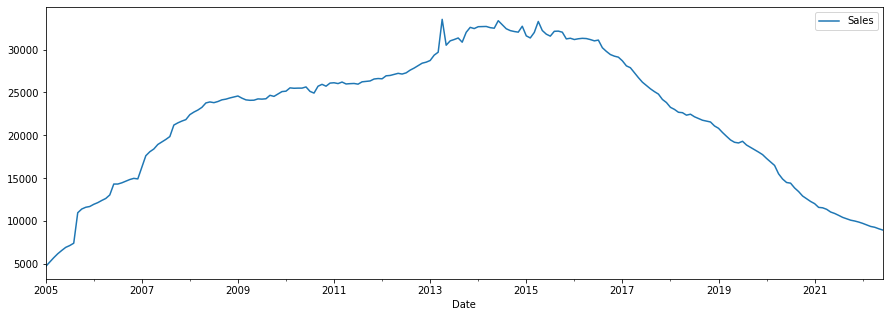

In [ ]:
data.plot(figsize=(15,5))

In [ ]:
# #In google colab we should install pmdarima in order to use it.
# !pip install pmdarima

In [ ]:
TEST_SIZE = 12*2
train, test = data.iloc[:-TEST_SIZE], data.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((186, 1), (186,), (24, 1), (24,))

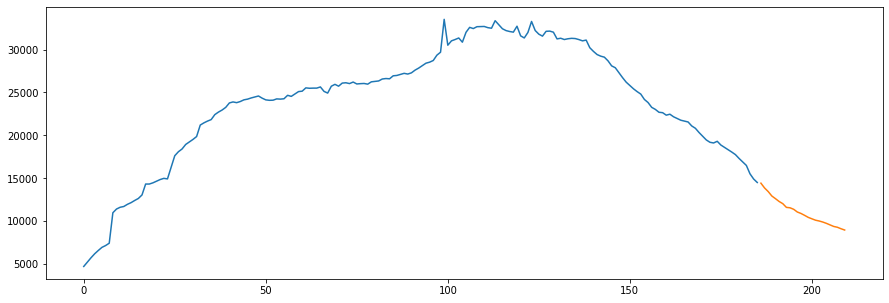

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)


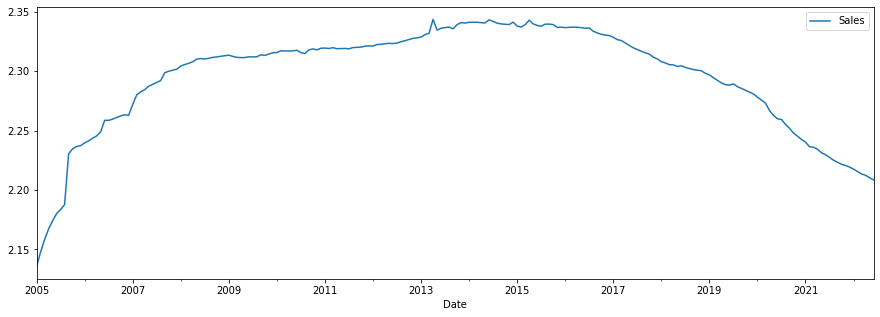

In [ ]:
data_log = np.log(data)
data_log_log = np.log(data_log)
(data_log_log.plot(figsize=(15,5)))

In [ ]:
# pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
model = auto_arima(np.log(np.log(train["Sales"])), start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1537.690, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1503.919, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1518.127, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1513.728, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1501.036, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1544.924, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1522.461, Time=0.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1522.498, Time=0.59 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1514.745, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1515.158, Time=0.43 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1525.560, Time=0.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1518.714, Time=1.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1534.259, Time=0.50 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 5.715 seconds


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  186
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 777.462
Date:                Fri, 09 Sep 2022   AIC                          -1544.924
Time:                        15:12:37   BIC                          -1528.822
Sample:                    01-01-2005   HQIC                         -1538.399
                         - 06-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.038e-05    5.8e-05      0.524      0.601   -8.34e-05       0.000
ar.L1          0.9174      0.082     11.237      0.000       0.757       1.077
ar.L2          0.0522      0.068      0.772      0.440      -0.080       0.185
ma.L1         -0.8545      0.062    -13.760      0.000      -0.976      -0.733
sigma2      1.302e-05   5.51e-07     23.621      0.000    1.19e-05    1.41e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             32702.56
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                             6.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        66.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:

prediction, confint = model.predict(n_periods=TEST_SIZE+6+(12*5), return_conf_int=True)

prediction = np.exp(np.exp(prediction))
prediction

2020-07-01    14245.233529
2020-08-01    13989.253590
2020-09-01    13749.597399
2020-10-01    13524.876497
2020-11-01    13314.157821
                  ...     
2027-08-01    13316.451006
2027-09-01    13412.860637
2027-10-01    13510.935161
2027-11-01    13610.677023
2027-12-01    13712.089205
Freq: MS, Length: 90, dtype: float64

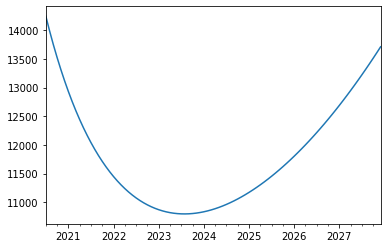

In [ ]:
prediction.plot()

In [ ]:
cf= pd.DataFrame(np.exp(np.exp(confint)))

(0.0, 33516.0)

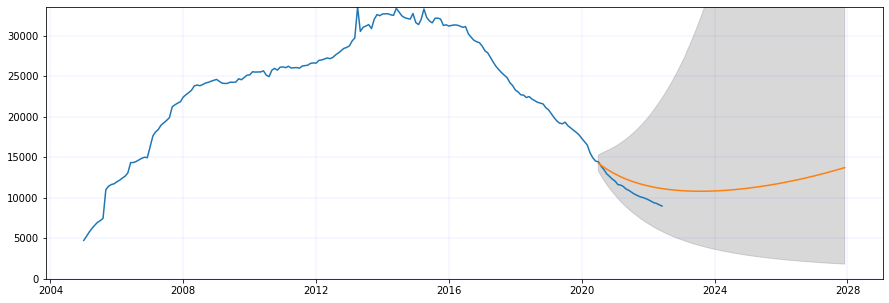

In [ ]:
#Mostramos la gráfica con la predicción de los 2 últimos años en naranja
#sobre la serie real 
prediction_series = pd.Series(prediction,index=prediction.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(data.Sales)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)
plt.grid(color='b', linestyle='-', linewidth=0.06)
ax.set_ylim([0, max(data.Sales)])

(0.0, 33516.0)

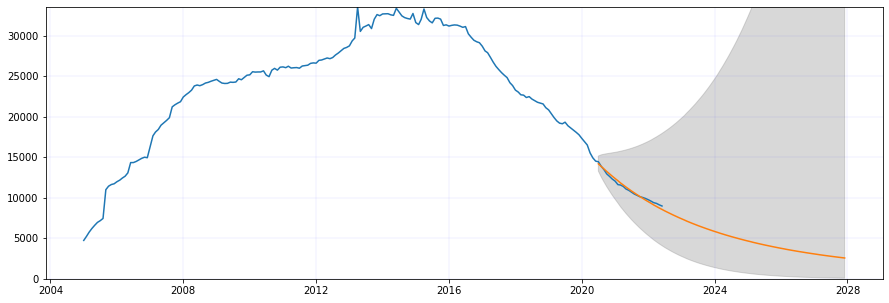

In [ ]:
#Mostramos la gráfica con la predicción de los 2 últimos años en naranja
#sobre la serie real 
prediction_series = pd.Series(prediction,index=prediction.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(data.Sales)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)
plt.grid(color='b', linestyle='-', linewidth=0.06)
ax.set_ylim([0, max(data.Sales)])

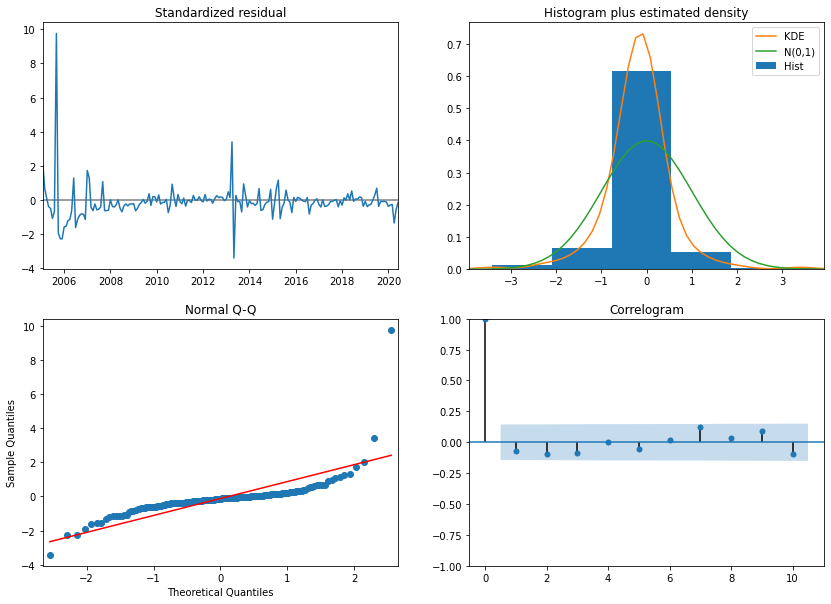

In [ ]:
model.plot_diagnostics(figsize=(14,10))
plt.show()

In [ ]:
def calcsmape(actual, forecast):
    return 1/len(actual) * np.sum(2 * np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast)))

In [ ]:
smape=calcsmape(test.Sales,prediction)
smape

0.021860215245071916

In [ ]:
TEST_SIZE = 12
train, test = data.iloc[:-TEST_SIZE], data.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((198, 1), (198,), (12, 1), (12,))

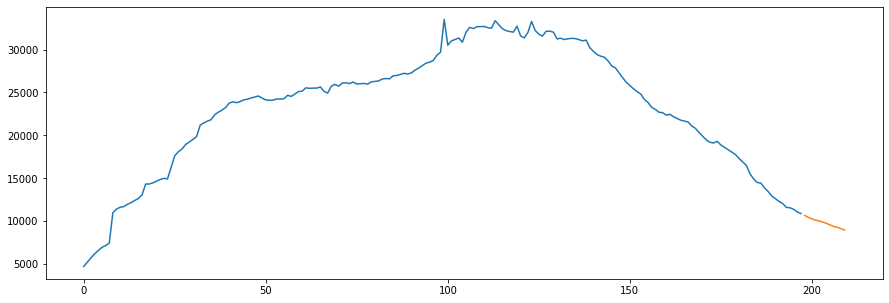

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)


In [ ]:
model = auto_arima(np.log(train["Sales"]), start_p=0, start_q=0,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-726.704, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-737.619, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-741.473, Time=0.27 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-742.611, Time=0.40 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-746.649, Time=0.46 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-745.359, Time=0.54 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-742.873, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-780.816, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-775.895, Time=0.56 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-768.363, Time=0.55 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-734.449, Time=0.95 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-748.974, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-779.245, Time=0.62 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-772.365, Time=0.66 sec
 ARIMA(3,1,0)(0

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  198
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 394.408
Date:                Fri, 09 Sep 2022   AIC                           -780.816
Time:                        14:28:14   BIC                           -767.683
Sample:                    01-01-2005   HQIC                          -775.500
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.491e-05      0.000      0.287      0.774      -0.000       0.001
ar.L1          0.9953      0.007    151.172      0.000       0.982       1.008
ma.L1         -0.8894      0.037    -23.839      0.000      -0.963      -0.816
sigma2         0.0011   4.46e-05     23.723      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   1.02   Jarque-Bera (JB):             26007.13
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.05   Skew:                             5.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        58.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction, confint = model.predict(n_periods=TEST_SIZE+6+(12*5), return_conf_int=True)

prediction = np.exp(prediction)
prediction

2021-07-01    10677.346876
2021-08-01    10455.305345
2021-09-01    10239.653185
2021-10-01    10030.176625
2021-11-01     9826.669990
                  ...     
2027-08-01     3464.001265
2027-09-01     3428.543230
2027-10-01     3393.865451
2027-11-01     3359.949621
2027-12-01     3326.777961
Freq: MS, Length: 78, dtype: float64

In [ ]:
cf= pd.DataFrame(np.exp(confint))

In [ ]:
test.index

DatetimeIndex(['2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

(0.0, 33516.0)

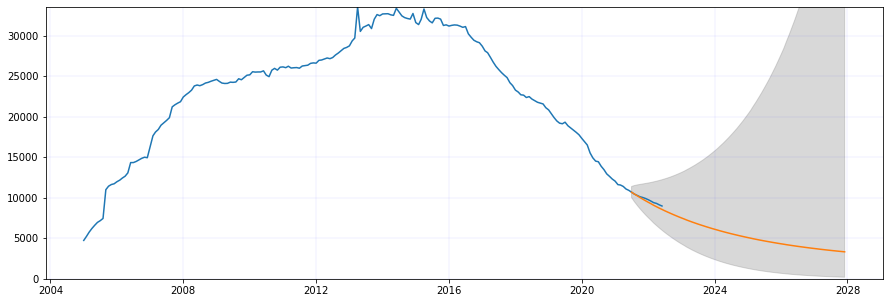

In [ ]:
prediction_series = pd.DataFrame(prediction, index=prediction.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(data.Sales)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)
plt.grid(color='b', linestyle='-', linewidth=0.06)
ax.set_ylim([0, max(data.Sales)])

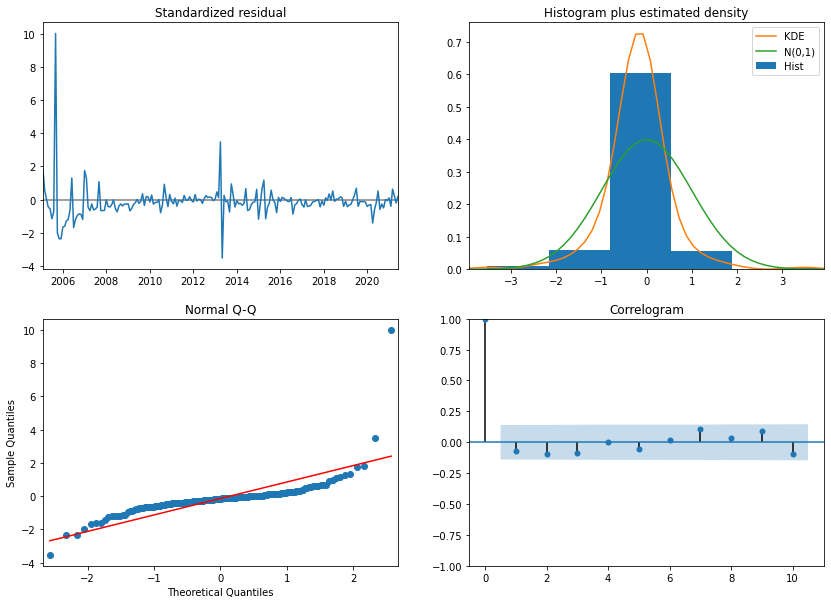

In [ ]:
model.plot_diagnostics(figsize=(14,10))
plt.show()

In [ ]:
smape=calcsmape(test.Sales,prediction)
smape

0.025230765491611396